In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
generi = pd.read_csv("generi.csv").dropna()
generi.head()

,MainGenere,Genere
0,electronic,acid house
1,jazz,acid jazz
2,electronic,acid techno
3,blues,acoustic blues
4,rock,acoustic rock


In [3]:
count = pd.read_csv("genere_graph_clean.csv")
count.head()

,Unnamed: 0,g,popu,collect(g1)
0,0,dubstep,21,"trap,disco,instrumental,dance,club,rave,pop,el..."
1,1,grunge,5,"trap,indie,rock"
2,2,orchestral,5,"funk,blues,fusion,rock"
3,3,bachata,14,"kizomba,dance,reggaeton,salsa,latin,tango,mere..."
4,4,turntablism,1,electro


In [4]:
db = generi.set_index("Genere").join(count.set_index("g")).dropna()
db.head()

,MainGenere,Unnamed: 0,popu,collect(g1)
Genere,,,,
alternative rock,rock,79.0,1.0,"disco,dance"
ambient,ambient,28.0,7.0,"grindcore,metal,pop,drone,lounge,rock"
americana,folk,42.0,8.0,country
bachata,latin,3.0,14.0,"kizomba,dance,reggaeton,salsa,latin,tango,mere..."
bebop,jazz,38.0,2.0,"funk,instrumental,jazz,salsa,latin,bluegrass,soul"


In [12]:
db.isnull().values.any()

False

In [8]:
generi_graph = nx.Graph()
generi_graph.add_nodes_from(db.index)
colours = {
    "ambient" : "#ccff33",
    "classical" : "#ccff99",
    "pop" : "#00ffff",
    "rock" : "#0066ff",
    "metal" : "#0000cc",
    "punk" : "#9900ff",
    "folk" : "#996633",
    "country" : "#ff9933",
    "latin" : "#ff0000",
    "dance" : "#ff0066",
    "electronic" : "#ffff00",
    "hip hop" : "#00cc99",
    "blues" : "#9966ff",
    "jazz" : "#ff66cc",
}
db["colour"] = db.MainGenere.map(lambda x: colours[x] if colours[x] else "#ffffff")
generi_graph.add_nodes_from(list(colours.keys()))
db.head()

,MainGenere,Unnamed: 0,popu,collect(g1),colour
Genere,,,,,
alternative rock,rock,79.0,1.0,"disco,dance",#0066ff
ambient,ambient,28.0,7.0,"grindcore,metal,pop,drone,lounge,rock",#ccff33
americana,folk,42.0,8.0,country,#996633
bachata,latin,3.0,14.0,"kizomba,dance,reggaeton,salsa,latin,tango,mere...",#ff0000
bebop,jazz,38.0,2.0,"funk,instrumental,jazz,salsa,latin,bluegrass,soul",#ff66cc


In [10]:
# connect the genere with its MainGenere
for index, row in db.iterrows():
    for g in row["collect(g1)"].split(","):
        generi_graph.add_edge(index, g)

In [13]:
db.isnull().values.any()

False

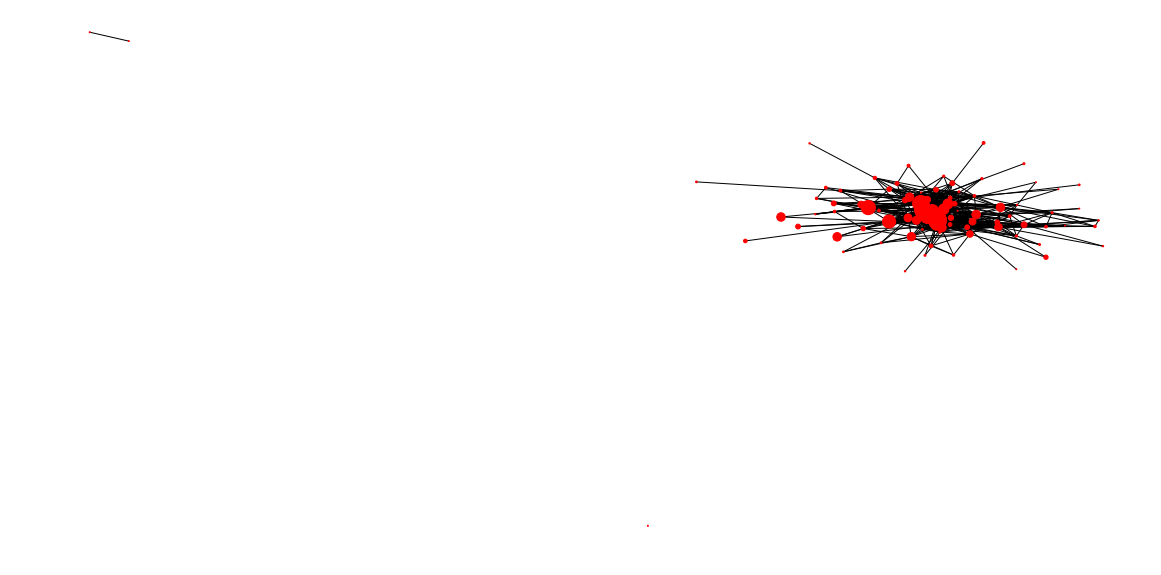

In [15]:
plt.figure(figsize=(20, 10))
plt.axis('off')
pos = nx.spring_layout(generi_graph)
nx.draw_networkx_nodes(generi_graph, pos,
                       # node_color=db.colour,
                       node_size=db.popu)  # change with community size
# text of the genere
# nx.draw_networkx_labels(generi_graph, pos)
nx.draw_networkx_edges(generi_graph, pos,
                       arrows=True)
plt.show()

In [ ]:
main_generi = pd.DataFrame([
    {"Genere" : k, "colour" : v} for k, v in colours.items()
])

main_generi_graph = nx.Graph()
main_generi_graph.add_nodes_from(main_generi.Genere)

In [ ]:
plt.figure(figsize=(20, 10))
plt.axis('off')
pos = nx.spring_layout(main_generi_graph)
nx.draw_networkx_nodes(main_generi_graph, pos,
                       node_color=main_generi.colour,
                       node_size=5000)  # change with community size
# text of the genere
nx.draw_networkx_labels(main_generi_graph, pos)
nx.draw_networkx_edges(main_generi_graph, pos,
                       arrows=True)
plt.show()

In [139]:
db2 = pd.DataFrame()
db2["genere"] = list(set(db["MainGenere"]))
db2.set_index("genere", inplace=True)
db2["count"] = db.groupby(["MainGenere"])["popu"].sum()
db2["links_genere"] = db.groupby(["MainGenere"])["collect(g1)"].apply(list)
db2["links"] = [[] for n in range(len(db2))]
for index, row in db2.iterrows():
    for genere_txt in row.links_genere:
        for genere in genere_txt.split(","):
            main_genere = list(generi.loc[generi.Genere == genere, "MainGenere"].values)
            if len(main_genere) > 0:
                row.links.append(main_genere[0])
db2 = db2.drop(["links_genere"], axis=1)
db2["links"] = db2["links"].map(lambda x: list(set(x)))
db2["len_links"] = db2.links.map(len)
db2["colour"] = db2.index.map(lambda x: colours[x])
db2

,count,links,len_links,colour
genere,,,,
dance,992.0,"[dance, metal, rock, ambient, blues, classical...",13,#ff0066
metal,54.0,"[dance, metal, rock, ambient, blues, folk, lat...",11,#0000cc
rock,308.0,"[dance, electronic, metal, rock, ambient, blue...",13,#0066ff
ambient,90.0,"[dance, metal, rock, ambient, blues, classical...",11,#ccff33
blues,169.0,"[dance, electronic, metal, rock, ambient, blue...",12,#9966ff
classical,185.0,"[dance, rock, ambient, classical, folk, latin,...",9,#ccff99
country,24.0,"[dance, rock, blues, folk, pop, jazz]",6,#ff9933
folk,199.0,"[dance, metal, rock, ambient, blues, classical...",13,#996633
hip hop,1.0,[electronic],1,#00cc99


In [140]:
generi_graph = nx.Graph()
generi_graph.add_nodes_from(db2.index)
for index, row in db2.iterrows():
    for g in row["links"]:
        generi_graph.add_edge(index, g)

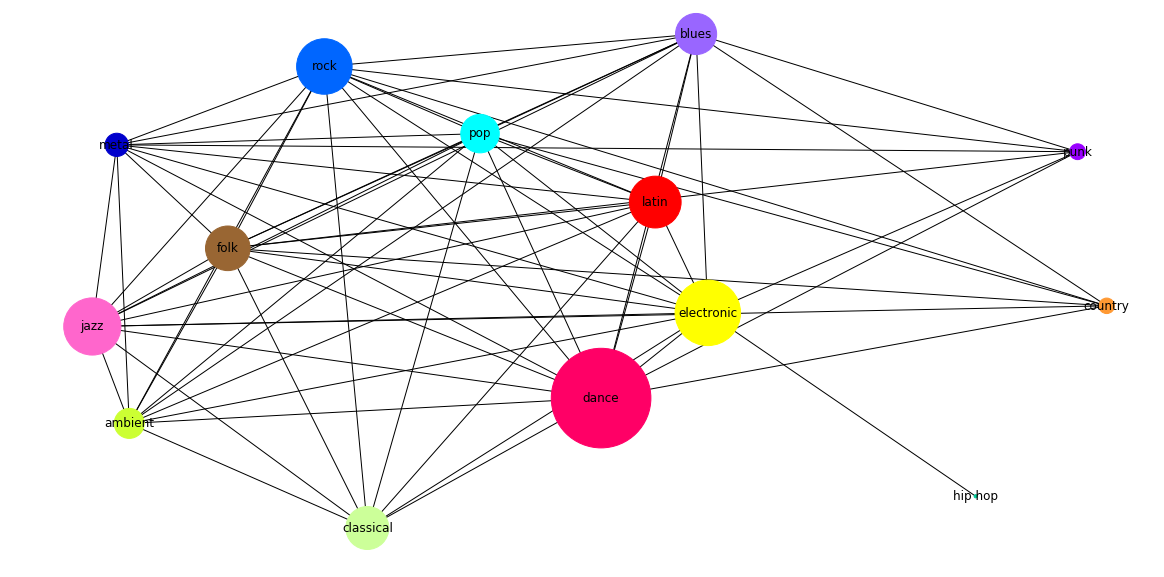

In [161]:
plt.figure(figsize=(20, 10))
plt.axis('off')
pos = nx.spring_layout(generi_graph, scale=100, k=3)
nx.draw_networkx_nodes(generi_graph, pos,
                       node_color=db2.colour,
                       node_size=db2["count"] * 10)  # change with community size
# text of the genere
nx.draw_networkx_labels(generi_graph, pos)
nx.draw_networkx_edges(generi_graph, pos,
                       arrows=True)
plt.show()